In [32]:
import matplotlib.pyplot as plt
import time
import numpy as np

In [33]:
def gen_cost_matrix(a, b):
    xlen = len(a) + 1
    ylen = len(b) + 1

    ret = np.matrix(np.ones((xlen,ylen)) * np.inf)
    ret[0,0] = 0
    for i in range(1, xlen):
        for j in range(1, ylen):
            dist = (a[i-1] - b[j-1])**2

            deletion = ret[i-1, j]
            insertion = ret[i, j-1]
            match = ret[i-1, j-1]

            ret[i,j] = dist + min(deletion, insertion, match)
    return ret

In [34]:
def cheapest_alignment(cost_matrix):
    dimensions = cost_matrix.shape
    rows, columns = dimensions
    i = rows - 1
    j = columns - 1

    cost = cost_matrix[i, j]
    path = [[]]
    path.append([i, j])
    while(i > 0 and j > 0):
        a = cost_matrix[i-1, j]
        b = cost_matrix[i, j-1]
        c = cost_matrix[i-1, j-1]
        tmp = np.array([a, b, c])
        ind = np.argmin(tmp)

        if ind == 0:
            cost += cost_matrix[i-1, j]
            i -= 1
        elif ind == 1:
            cost += cost_matrix[i, j-1]
            j -= 1
        else:
            cost += cost_matrix[i-1, j-1]
            i-=1
            j-=1
        path.append([i, j])
    path = path[1:] # Remove empty entry
    return cost, path

In [35]:
def cost(a, b):
    cost_matrix = gen_cost_matrix(a, b)
    cost, path = cheapest_alignment(cost_matrix)
    return cost, path

In [36]:
def plot_dtw_mapping(path, a, b):
    main_sample_time = np.arange(0, len(a))
    sample_time = np.arange(0, len(b))

    #DTW
    b = np.array(b)
    plt.plot(main_sample_time, a)
    plt.plot(sample_time, b + max(a))
    plt.title("Dynamic Time Warping Mapping")

    for j in range(1, len(path)-1):
        plt.plot([path[j][0]-1, path[j][1]-1], [a[path[j][0]-1], b[path[j][1]-1] + max(a)],'-k')
    plt.show()

In [49]:
step = 40
time1 = np.linspace(start=0, stop=1, num=step)
time2 = time1[0:step]
a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 1.5)

DTW Cost: 852.7285117727972


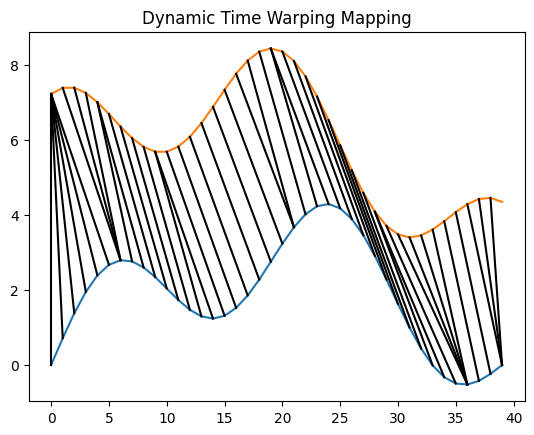

In [50]:
total_cost, path = cost(a, b)

print("DTW Cost: " + str(total_cost))
plot_dtw_mapping(path, a, b)

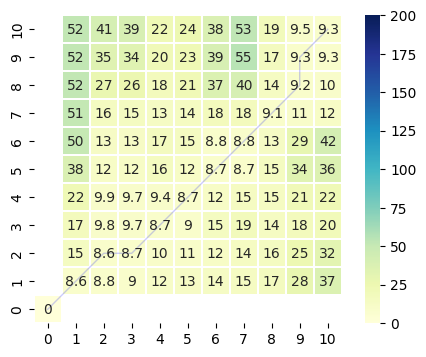

In [39]:
# https://www.theaidream.com/post/dynamic-time-warping-dtw-algorithm-in-time-series
import seaborn as sbn

cost_matrix = gen_cost_matrix(b, a)

fig, ax = plt.subplots(figsize=(6, 4))
ax = sbn.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax, vmin=0, vmax=200)
ax.invert_yaxis()

# Get the warp path in x and y directions
path_x = [p[0] for p in path]
path_y = [p[1] for p in path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=1, alpha=0.2)

In [47]:
input_steps = []
times = []
for i in range(4, 200, 10):
    step = 10*i
    time1 = np.linspace(start=0, stop=1, num=step)
    time2 = time1[0:step]
    a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
    b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 
    start = time.time()
    total_cost, path = cost(a, b)
    end = time.time()

    input_steps.append(step)
    times.append(end-start)
    print("Step: " + str(step) + " Time to run: " + str(end - start))



Step: 40 Time to run: 0.004111051559448242
Step: 140 Time to run: 0.030934810638427734
Step: 240 Time to run: 0.08320426940917969
Step: 340 Time to run: 0.1698451042175293
Step: 440 Time to run: 0.28595900535583496
Step: 540 Time to run: 0.43360280990600586
Step: 640 Time to run: 0.6001169681549072
Step: 740 Time to run: 0.8118689060211182
Step: 840 Time to run: 1.0290050506591797
Step: 940 Time to run: 1.4251630306243896
Step: 1040 Time to run: 1.5685930252075195
Step: 1140 Time to run: 1.9068381786346436
Step: 1240 Time to run: 2.256787061691284
Step: 1340 Time to run: 2.614184856414795
Step: 1440 Time to run: 3.0462188720703125
Step: 1540 Time to run: 3.435448169708252
Step: 1640 Time to run: 3.906850814819336
Step: 1740 Time to run: 4.383664131164551
Step: 1840 Time to run: 4.995465040206909
Step: 1940 Time to run: 6.026104211807251


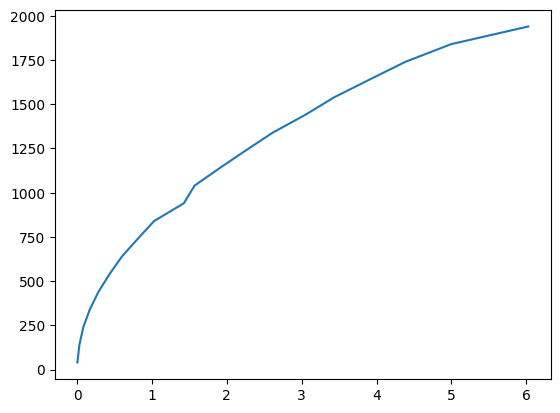

In [48]:
# Average time per x inputs
plt.plot(times, input_steps)

Interestingly, as we increase the input size, the time appears to grow logarithmically. The dynamic timewarping algorithm has a worst case runtime of O(nm). This is a great example to show that emperical runtime and asymptotic runtimes can be different when testing an algorithm on realworld data. 

In [42]:
main_sample = [7, 1, 2, 5, 9]
b = [1, 8, 0, 4, 4, 2, 0]
c = [1, 5, 3, 6, 2, 2, 3, 2, 2]
d = [7, 7, 2, 2, 5, 10] 
e = [6, 7, 2, 1, 5, 8, 8]
f = [7, 2, 2, 5, 8]
g = [7, 8, 9, 0, 7, 7, 0, 1, 2, 3, 4]
h = [6, 3, 2, 6, 3, 7, 3, 3, 0, 0]

samples = [b, c, d, e, f, g, h]

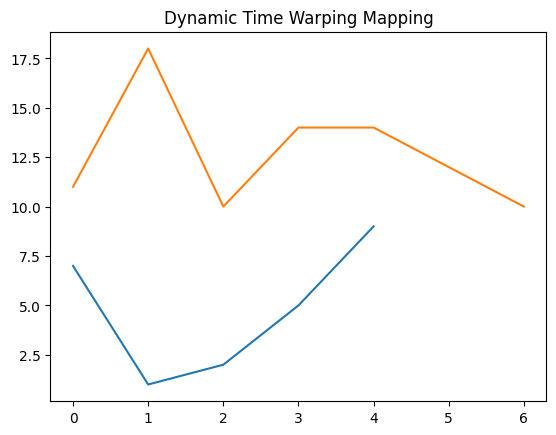

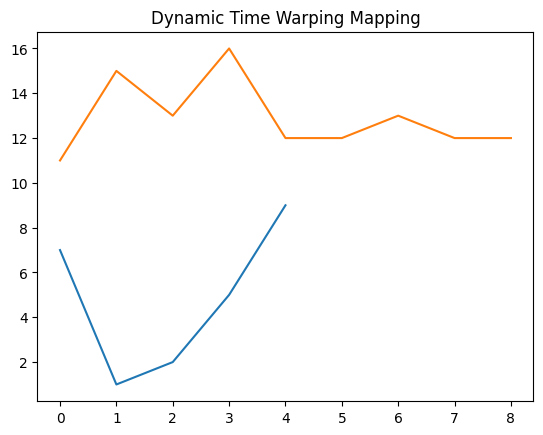

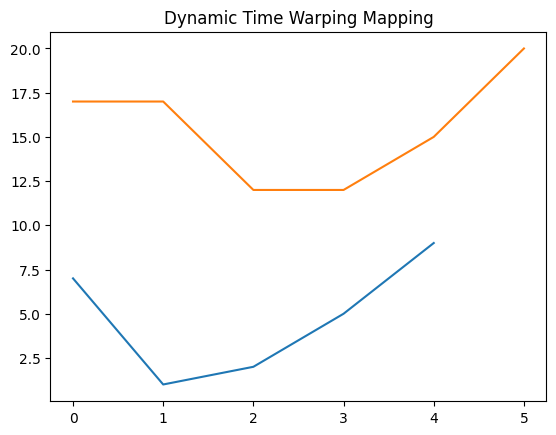

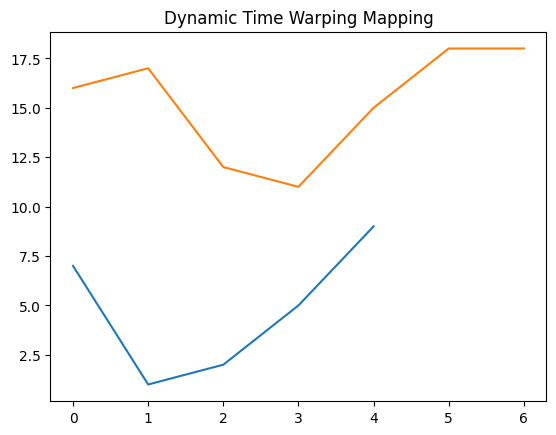

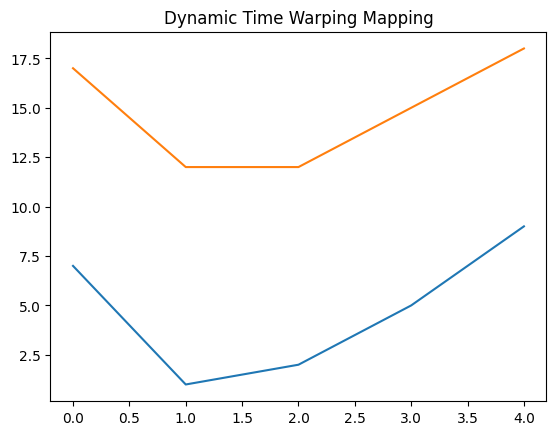

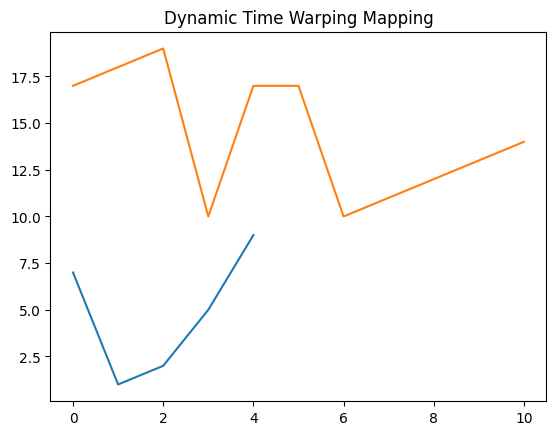

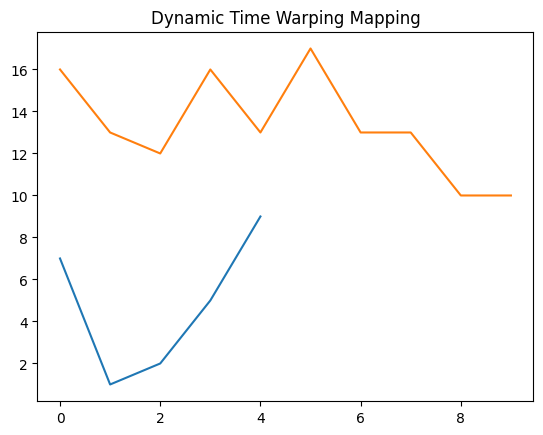

In [43]:
for i in range(len(samples)):


    main_sample_time = np.arange(0, len(main_sample))
    sample_time = np.arange(0, len(samples[i]))

    samples[i] = np.array(samples[i])
    plt.plot(main_sample_time, main_sample)
    plt.plot(sample_time, samples[i] + max(main_sample) + 1)
    plt.title("Dynamic Time Warping Mapping")
    
    plt.show()


Based on the seven orange plots above, which one visually looks the most similar to the blue plot?

Time to run: 0.0007507801055908203
DTW Cost: 381.0


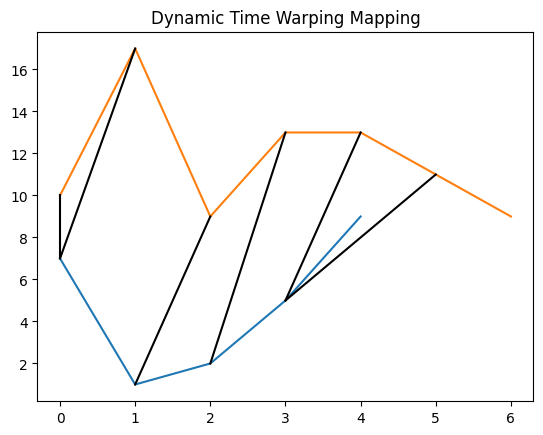

Time to run: 0.00020503997802734375
DTW Cost: 725.0


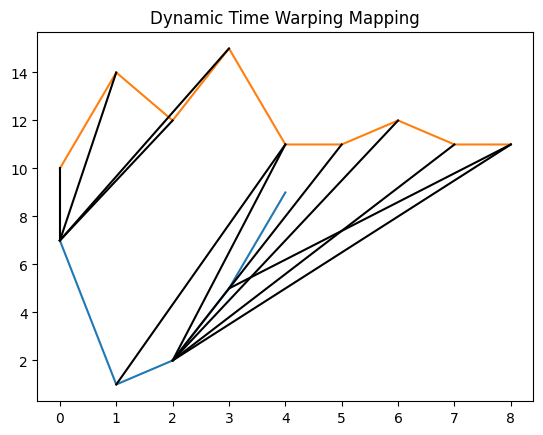

Time to run: 0.00013589859008789062
DTW Cost: 6.0


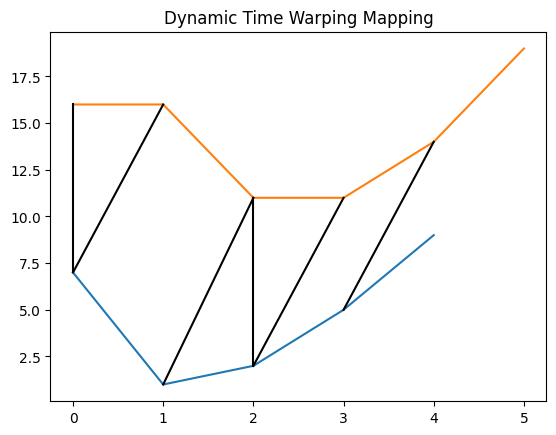

Time to run: 0.0001647472381591797
DTW Cost: 21.0


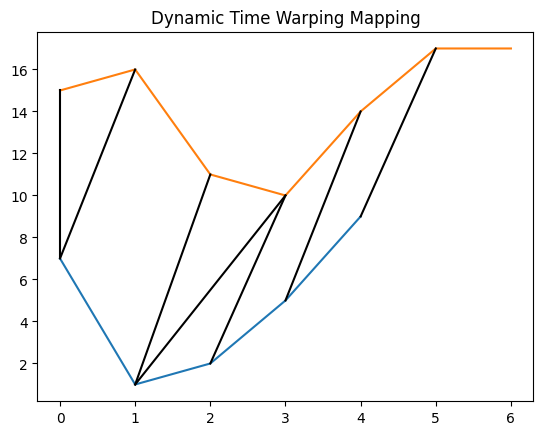

Time to run: 0.00013494491577148438
DTW Cost: 6.0


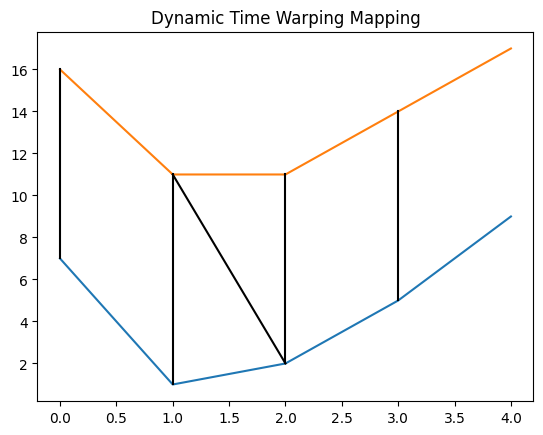

Time to run: 0.0002231597900390625
DTW Cost: 528.0


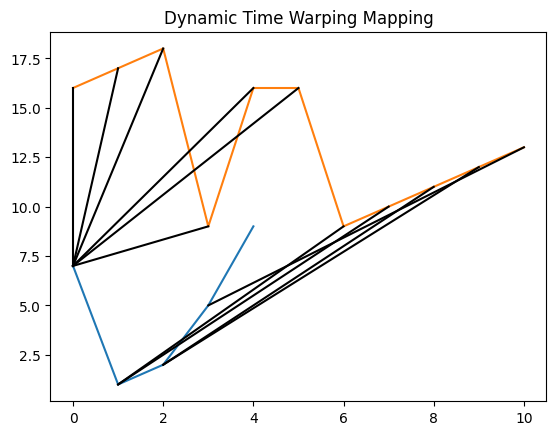

Time to run: 0.00018525123596191406
DTW Cost: 256.0


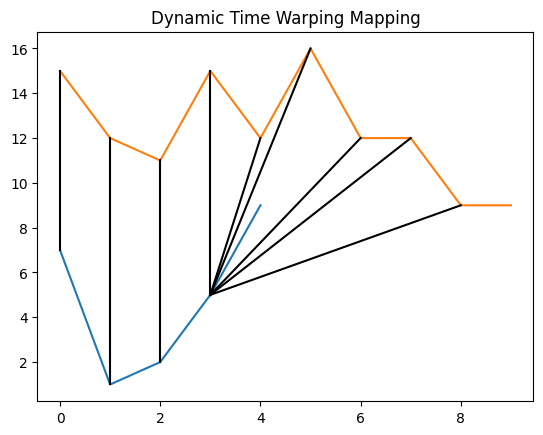

In [44]:
for i in range(len(samples)):

    start = time.time()
    cost_cos, path = cost(main_sample, samples[i])
    end = time.time()

    print("Time to run: " + str(end - start))
    print("DTW Cost: " + str(cost_cos))
    plot_dtw_mapping(path, main_sample, samples[i])

In [45]:
import fastdtw 

custom_dtw = []
fast_dtw = []
for sample in samples:
    dist, path_fast = fastdtw.fastdtw(main_sample, sample, dist = 2)
    fast_dtw.append(dist)

    total_cost, path = cost(main_sample, sample)
    custom_dtw.append(total_cost)

# fastdtw gives same minimum as custom algorithm
result_custom = custom_dtw.index(min(custom_dtw))
result_fast = fast_dtw.index(min(fast_dtw))

print(result_custom)
print(result_fast)



2
2
